# Final Project Module D EDA

## Disease Activity

We plan to focus on the ongoing Covid-19 pandemic. Therefore, our EDA will look at the two Covid datasources:
- John Hopkins University Center for Systems Science and Engineering (CSSEGIS): https://github.com/CSSEGISandData/COVID-19
- Midas Network: https://github.com/midas-network/COVID-19

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## CSSEGIS Data

The CSSEGIS data has a few different data segments. The two folders we will mainly be looking at are the daily reports and the time series data. Let us further investigate the data.

### Daily Reports

There exists a daily report for each day starting from 01/22/2020 - present. Let us investigate the form of the daily reports by looking at the most recent CSV:

In [212]:
datetime.now().day

13

In [213]:
# Most recent report
today = datetime.now()

# Daily report 
recent_dr = pd.read_csv(f'../covid/CSSEGIS_COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/0{today.month}-{today.day - 1}-{today.year}.csv')
recent_dr.head()


,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-04-12 23:18:00,34.223334,-82.461707,9,0,0,9,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-04-12 23:18:00,30.295065,-92.414197,99,5,0,94,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-04-12 23:18:00,37.767072,-75.632346,15,0,0,15,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-04-12 23:18:00,43.452658,-116.241552,517,6,0,511,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-04-12 23:18:00,41.330756,-94.471059,1,0,0,1,"Adair, Iowa, US"


In [214]:
# Number of countries/regions listed
print(f"{len(recent_dr.Country_Region.unique())} countries/regions are represented")

185 countries/regions are represented


In [215]:
US_countries_idx = np.where(recent_dr.Country_Region == "US")
recent_dr.iloc[US_countries_idx].Province_State.unique()

array(['South Carolina', 'Louisiana', 'Virginia', 'Idaho', 'Iowa',
       'Kentucky', 'Missouri', 'Oklahoma', 'Colorado', 'Illinois',
       'Indiana', 'Mississippi', 'Nebraska', 'Ohio', 'Pennsylvania',
       'Washington', 'Wisconsin', 'Vermont', 'Florida', 'North Carolina',
       'California', 'New York', 'Wyoming', 'Michigan', 'Maryland',
       'Alaska', 'Kansas', 'Tennessee', 'Texas', 'Maine', 'Minnesota',
       'Arizona', 'Georgia', 'Arkansas', 'New Jersey', 'South Dakota',
       'Alabama', 'West Virginia', 'North Dakota', 'Massachusetts',
       'Montana', 'New Hampshire', 'Oregon', 'New Mexico', 'Utah',
       'Rhode Island', 'Nevada', 'District of Columbia', 'Connecticut',
       'Hawaii', 'Delaware', 'Northern Mariana Islands',
       'Diamond Princess', 'Grand Princess', 'Guam', 'Puerto Rico',
       'Recovered', 'Virgin Islands'], dtype=object)

In [216]:
# Top confirmed cases in the US
recent_dr.iloc[US_countries_idx].sort_values(by = ['Confirmed'], ascending = False)

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
1747,36061.0,New York City,New York,US,2020-04-12 23:18:00,40.767273,-73.971526,103208,6898,0,96310,"New York City, New York, US"
1729,36059.0,Nassau,New York,US,2020-04-12 23:18:00,40.740665,-73.589419,23553,846,0,22707,"Nassau, New York, US"
2305,36103.0,Suffolk,New York,US,2020-04-12 23:18:00,40.883201,-72.801217,20934,518,0,20416,"Suffolk, New York, US"
2617,36119.0,Westchester,New York,US,2020-04-12 23:18:00,41.162784,-73.757417,19313,511,0,18802,"Westchester, New York, US"
541,17031.0,Cook,Illinois,US,2020-04-12 23:18:00,41.841448,-87.816588,14585,485,0,14100,"Cook, Illinois, US"
...,...,...,...,...,...,...,...,...,...,...,...,...
2430,90016.0,Unassigned,Idaho,US,2020-04-12 23:18:00,NaN,NaN,0,0,0,0,"Unassigned, Idaho, US"
2432,90018.0,Unassigned,Indiana,US,2020-04-12 23:18:00,NaN,NaN,0,0,0,0,"Unassigned, Indiana, US"
2433,90019.0,Unassigned,Iowa,US,2020-04-12 23:18:00,NaN,NaN,0,6,0,-6,"Unassigned, Iowa, US"
2434,90020.0,Unassigned,Kansas,US,2020-04-12 23:18:00,NaN,NaN,0,4,0,-4,"Unassigned, Kansas, US"


In [217]:
recent_dr.sort_values(by = ['Confirmed'], ascending = False).head(10)

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
2960,NaN,NaN,NaN,Spain,2020-04-12 23:17:00,40.463667,-3.749220,166831,17209,62391,87231,Spain
2888,NaN,NaN,NaN,Italy,2020-04-12 23:17:00,41.871940,12.567380,156363,19899,34211,102253,Italy
2865,250.0,NaN,NaN,France,2020-04-12 23:17:00,46.227600,2.213700,132591,14393,27186,91012,France
2869,NaN,NaN,NaN,Germany,2020-04-12 23:17:00,51.165691,10.451526,127854,3022,60300,64532,Germany
1747,36061.0,New York City,New York,US,2020-04-12 23:18:00,40.767273,-73.971526,103208,6898,0,96310,"New York City, New York, US"
2978,NaN,NaN,NaN,United Kingdom,2020-04-12 23:17:00,55.378100,-3.436000,84279,10612,344,73323,United Kingdom
2884,NaN,NaN,NaN,Iran,2020-04-12 23:17:00,32.427908,53.688046,71686,4474,43894,23318,Iran
2754,NaN,NaN,Hubei,China,2020-04-12 02:25:00,30.975600,112.270700,67803,3219,64281,303,"Hubei, China"
2974,NaN,NaN,NaN,Turkey,2020-04-12 23:17:00,38.963700,35.243300,56956,1198,3446,52312,Turkey
2822,NaN,NaN,NaN,Belgium,2020-04-12 23:17:00,50.833300,4.469936,29647,3600,6463,19584,Belgium


In [218]:
recent_dr_by_country = recent_dr.groupby(['Country_Region']).sum().reset_index()
recent_dr_by_country.sort_values(by = ['Confirmed'], ascending = False).head(10)

,Country_Region,FIPS,Lat,Long_,Confirmed,Deaths,Recovered,Active
171,US,84404323.0,101738.698305,-242312.931214,555313,22020,32988,500305
156,Spain,0.0,40.463667,-3.749220,166831,17209,62391,87231
84,Italy,0.0,41.871940,12.567380,156363,19899,34211,102253
61,France,250.0,91.463495,-238.646914,133670,14412,27469,91789
65,Germany,0.0,51.165691,10.451526,127854,3022,60300,64532
175,United Kingdom,0.0,270.029898,-482.924666,85206,10629,626,73951
36,China,0.0,1083.336700,3684.419700,83134,3343,77956,1835
80,Iran,0.0,32.427908,53.688046,71686,4474,43894,23318
170,Turkey,0.0,38.963700,35.243300,56956,1198,3446,52312
16,Belgium,0.0,50.833300,4.469936,29647,3600,6463,19584


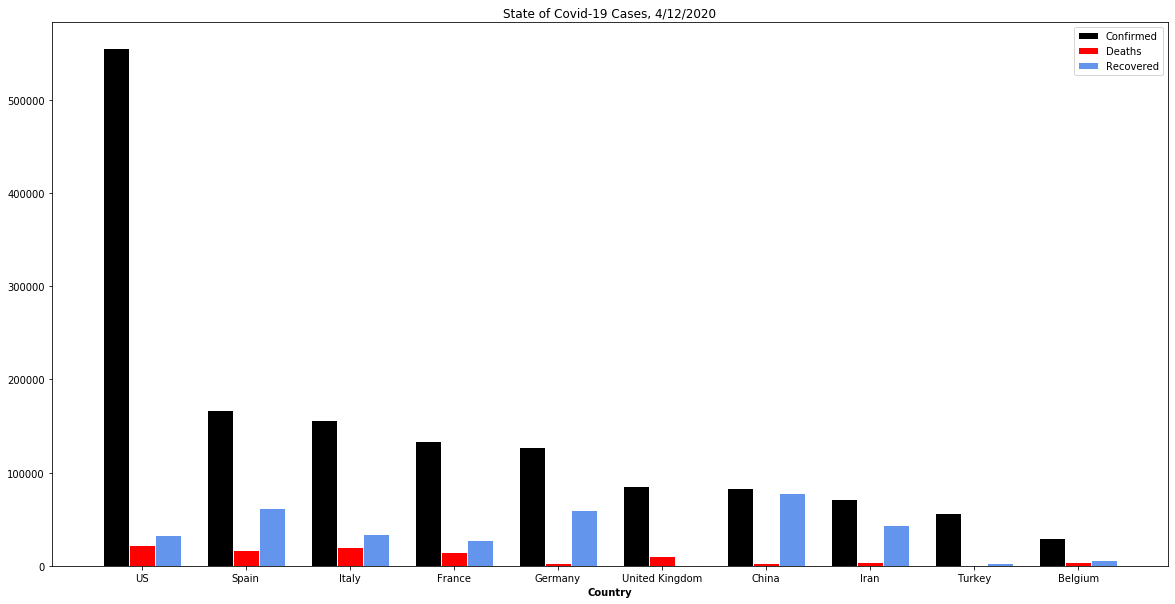

In [220]:
top10cases = recent_dr_by_country.sort_values(by = ['Confirmed'], ascending = False).head(10)

# set width of bar
plt.figure(figsize=(20,10))
barWidth = 0.25
 
# Set position of bar on X axis
confirmed = np.arange(10)
deaths = [x + barWidth for x in confirmed]
recovered = [x + barWidth for x in deaths]
 
# Make the plot
plt.bar(confirmed, top10cases.Confirmed, color="black", width=barWidth, edgecolor='white', label='Confirmed')
plt.bar(deaths, top10cases.Deaths, color="red", width=barWidth, edgecolor='white', label='Deaths')
plt.bar(recovered, top10cases.Recovered, color='cornflowerblue', width=barWidth, edgecolor='white', label='Recovered')
 
# Add xticks on the middle of the group bars
plt.xlabel('Country', fontweight='bold')
plt.xticks([r + barWidth for r in range(10)], top10cases.Country_Region)
 
# Create legend & Show graphic
plt.legend()
plt.title(f"State of Covid-19 Cases, {today.month}/{today.day - 1}/{today.year}")
plt.show()


The daily reports list the amount of confirmed cases, deaths, and recovered cases for a province/state in a country.

### Time Series

In [221]:
# Time Series - Global confirmed cases
ts_global_confirmed = pd.read_csv('../covid/CSSEGIS_COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
ts_global_confirmed.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,281,299,349,367,423,444,484,521,555,607
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,304,333,361,377,383,400,409,416,433,446
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,1171,1251,1320,1423,1468,1572,1666,1761,1825,1914
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,439,466,501,525,545,564,583,601,601,638
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,8,10,14,16,17,19,19,19,19,19


In [222]:
# Time Series - Global deaths
ts_global_deaths = pd.read_csv('../covid/CSSEGIS_COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
ts_global_deaths.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,6,7,7,11,14,14,15,15,18,18
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,17,20,20,21,22,22,23,23,23,23
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,105,130,152,173,193,205,235,256,275,293
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,16,17,18,21,22,23,25,26,26,29
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [223]:
# Time Series - Global recovered
ts_global_recovered = pd.read_csv('../covid/CSSEGIS_COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
ts_global_recovered.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,10,10,15,18,18,29,32,32,32,32
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,89,99,104,116,131,154,165,182,197,217
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,62,90,90,90,113,237,347,405,460,591
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,16,21,26,31,39,52,58,71,71,128
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,1,2,2,2,2,2,2,2,4,4


In [224]:
ts_global_recovered_by_country = ts_global_recovered.groupby(['Country/Region']).sum().reset_index()
ts_top10recovered = ts_global_recovered_by_country.loc[ts_global_recovered_by_country['Country/Region'].isin(top10cases.Country_Region)]
ts_top10recovered


,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20
16,Belgium,50.8333,4.0000,0,0,0,0,0,0,0,...,2872,3247,3751,3986,4157,4681,5164,5568,5986,6463
36,China,1083.3367,3684.4197,28,30,36,39,49,58,101,...,76760,76946,77207,77310,77410,77567,77679,77791,77877,77956
61,France,91.3624,59.7192,0,0,0,0,0,0,0,...,14135,15572,16349,17428,19523,21452,23413,25195,26663,27469
65,Germany,51.0000,9.0000,0,0,0,0,0,0,0,...,24575,26400,28700,28700,36081,46300,52407,53913,57400,60300
80,Iran,32.0000,53.0000,0,0,0,0,0,0,0,...,17935,19736,19736,24236,27039,29812,32309,35465,41947,43894
84,Italy,43.0000,12.0000,0,0,0,0,0,0,0,...,19758,20996,21815,22837,24392,26491,28470,30455,32534,34211
156,Spain,40.0000,-4.0000,0,0,0,0,0,0,0,...,30513,34219,38080,40437,43208,48021,52165,55668,59109,62391
170,Turkey,38.9637,35.2433,0,0,0,0,0,0,0,...,484,786,1042,1326,1582,1846,2142,2423,2965,3446
171,US,37.0902,-95.7129,0,0,0,0,0,0,0,...,9707,14652,17448,19581,21763,23559,25410,28790,31270,32988
175,United Kingdom,270.0299,-482.9247,0,0,0,0,0,0,0,...,208,215,229,287,325,345,359,588,622,626


In [225]:
ts_global_confirmed_by_country = ts_global_confirmed.groupby(['Country/Region']).sum().reset_index()
ts_top10confirmed = ts_global_confirmed_by_country.loc[ts_global_confirmed_by_country['Country/Region'].isin(top10cases.Country_Region)]
ts_top10confirmed


,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20
16,Belgium,50.8333,4.0000,0,0,0,0,0,0,0,...,16770,18431,19691,20814,22194,23403,24983,26667,28018,29647
36,China,1083.3367,3684.4197,548,643,920,1406,2075,2877,5509,...,82511,82543,82602,82665,82718,82809,82883,82941,83014,83134
61,France,91.3624,59.7192,0,0,2,3,3,3,4,...,65202,90848,93773,98963,110065,113959,118781,125931,130727,133670
65,Germany,51.0000,9.0000,0,0,0,0,0,1,4,...,91159,96092,100123,103374,107663,113296,118181,122171,124908,127854
80,Iran,32.0000,53.0000,0,0,0,0,0,0,0,...,53183,55743,58226,60500,62589,64586,66220,68192,70029,71686
84,Italy,43.0000,12.0000,0,0,0,0,0,0,0,...,119827,124632,128948,132547,135586,139422,143626,147577,152271,156363
156,Spain,40.0000,-4.0000,0,0,0,0,0,0,0,...,119199,126168,131646,136675,141942,148220,153222,158273,163027,166831
170,Turkey,38.9637,35.2433,0,0,0,0,0,0,0,...,20921,23934,27069,30217,34109,38226,42282,47029,52167,56956
171,US,37.0902,-95.7129,1,1,2,2,5,5,5,...,275586,308853,337072,366667,396223,429052,461437,496535,526396,555313
175,United Kingdom,270.0299,-482.9247,0,0,0,0,0,0,0,...,38689,42477,48436,52279,55949,61474,65872,74605,79874,85206


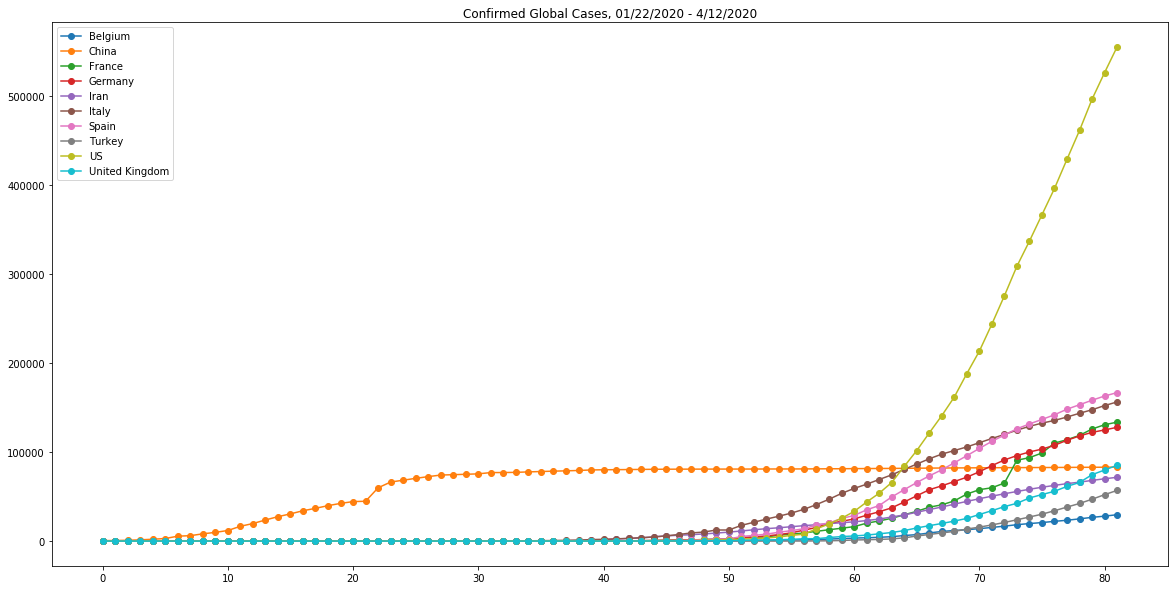

In [227]:
plt.figure(figsize=(20,10))
for i in range(10):
    plt.plot(range(len(ts_top10confirmed.T[3:])), ts_top10confirmed.T[3:].T.iloc[i], marker = 'o', 
             label = ts_top10confirmed['Country/Region'].iloc[i])

plt.legend()
plt.title(f"Confirmed Global Cases, 01/22/2020 - {today.month}/{today.day - 1}/{today.year}")
plt.show()

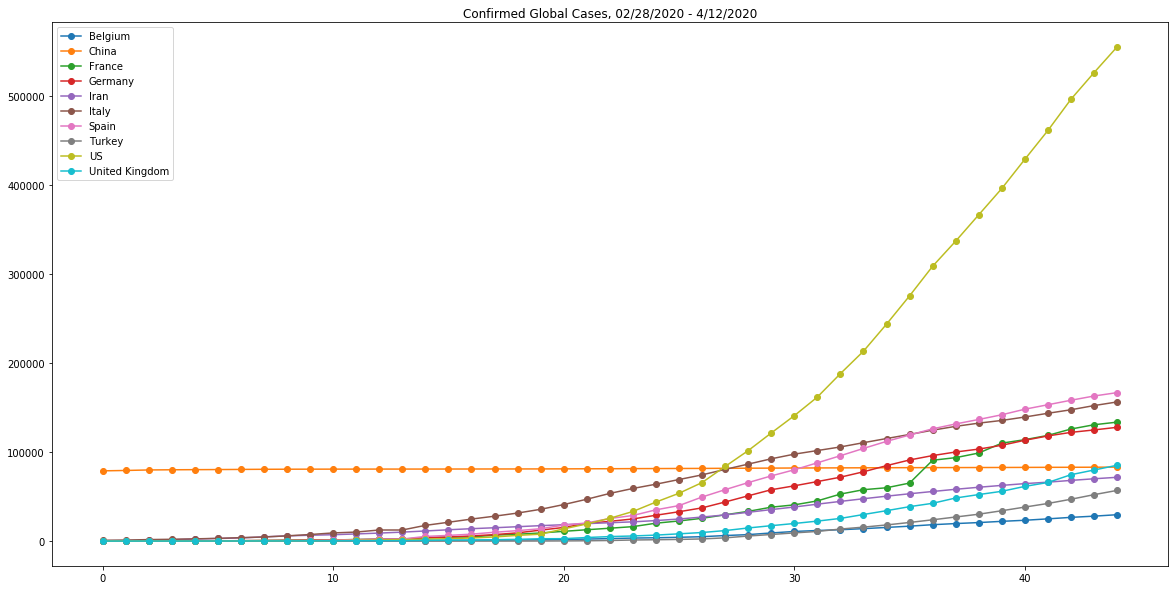

In [228]:
plt.figure(figsize=(20,10))
for i in range(10):
    plt.plot(range(len(ts_top10confirmed.T[40:])), ts_top10confirmed.T[40:].T.iloc[i], marker = 'o', 
             label = ts_top10confirmed['Country/Region'].iloc[i])

plt.legend()
plt.title(f"Confirmed Global Cases, 02/28/2020 - {today.month}/{today.day - 1}/{today.year}")
plt.show()

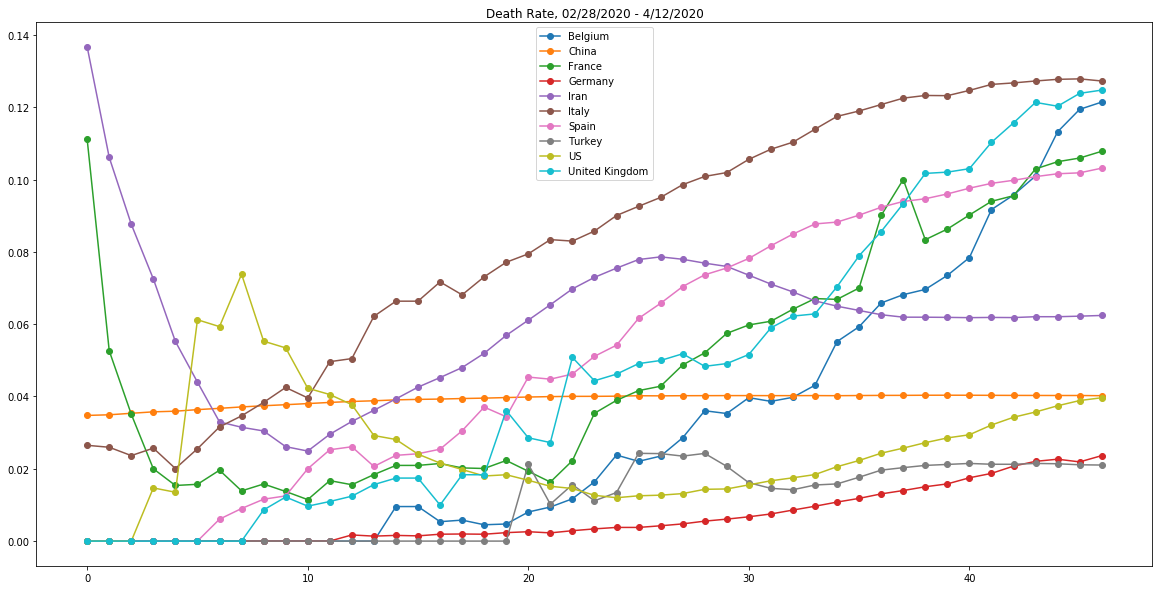

In [229]:
ts_global_death_by_country = ts_global_deaths.groupby(['Country/Region']).sum().reset_index()
ts_top10deaths = ts_global_death_by_country.loc[ts_global_death_by_country['Country/Region'].isin(top10cases.Country_Region)]

df_death_rate = ts_top10deaths.T[3:].T / (ts_top10confirmed.T[3:].T + 0.000001)
df_left = ts_top10deaths.T[:3].T
ts_top10_death_rate = pd.concat([df_left, df_death_rate], axis = 1, sort = False) 

plt.figure(figsize=(20,10))
for i in range(10):
    plt.plot(range(len(ts_top10_death_rate.T[38:])), ts_top10_death_rate.T[38:].T.iloc[i], marker = 'o', 
             label = ts_top10_death_rate['Country/Region'].iloc[i])

plt.legend()
plt.title(f"Death Rate, 02/28/2020 - {today.month}/{today.day - 1}/{today.year}")
plt.show()


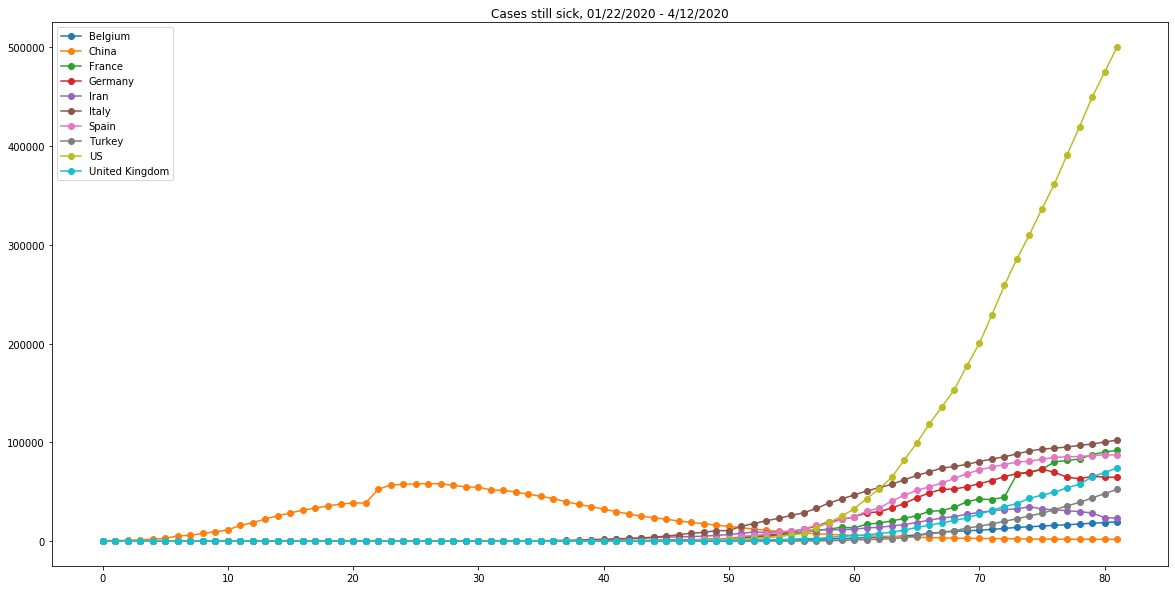

In [230]:
# What does the recovery look like? Confirmed - recovered - deaths
df_currentlysick = ts_top10confirmed.T[3:].T - ts_top10recovered.T[3:].T - ts_top10deaths.T[3:].T
df_left = ts_top10confirmed.T[:3].T
ts_top10_currentlysick = pd.concat([df_left, df_currentlysick], axis = 1, sort = False) 

plt.figure(figsize=(20,10))
for i in range(10):
    plt.plot(range(len(ts_top10_currentlysick.T[3:])), ts_top10_currentlysick.T[3:].T.iloc[i], marker = 'o', 
             label = ts_top10_currentlysick['Country/Region'].iloc[i])

plt.legend()
plt.title(f"Cases still sick, 01/22/2020 - {today.month}/{today.day - 1}/{today.year}")
plt.show()


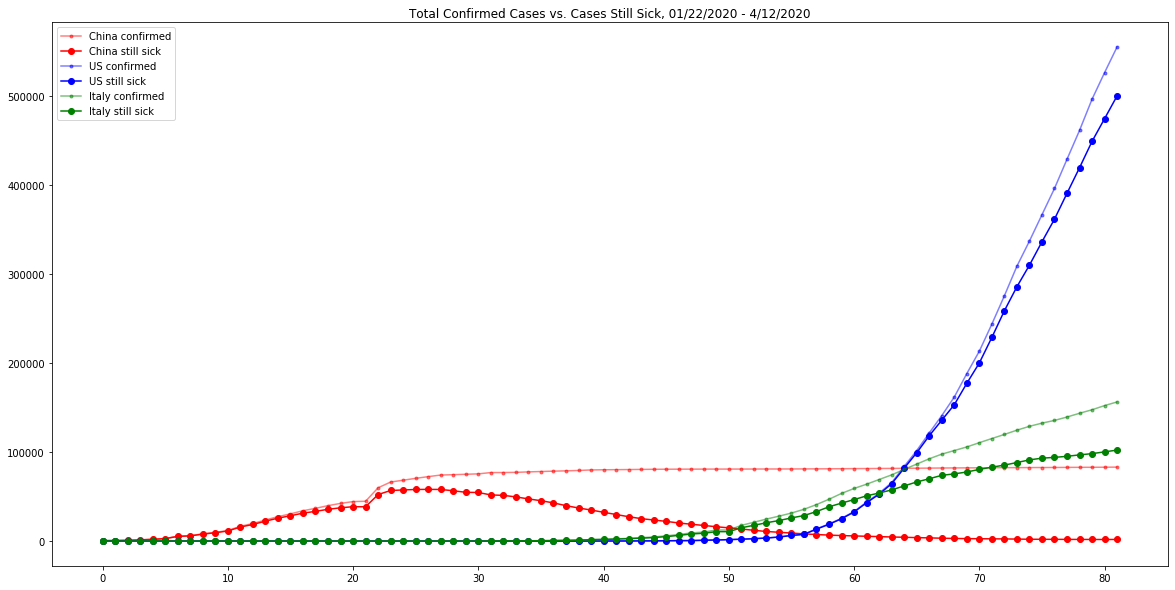

In [231]:
countries_to_plot = ['China', 'US', 'Italy']
color_per_country = ['red', 'blue', 'green']
plt.figure(figsize=(20,10))
for i, country in enumerate(countries_to_plot):
    plt.plot(range(len(ts_top10confirmed.T[3:])), 
             ts_top10confirmed.T[3:].T.loc[ts_top10confirmed['Country/Region'] == country].values.reshape(-1), 
             marker = '.', label = country + " confirmed", color = color_per_country[i], alpha = 0.5)
    plt.plot(range(len(ts_top10_currentlysick.T[3:])), 
             ts_top10_currentlysick.T[3:].T.loc[ts_top10_currentlysick['Country/Region'] == country].values.reshape(-1), 
             marker = 'o', label = country + " still sick", color = color_per_country[i])

plt.legend()
plt.title(f"Total Confirmed Cases vs. Cases Still Sick, 01/22/2020 - {today.month}/{today.day - 1}/{today.year}")
plt.show()

In [232]:
# Time Series - US confirmed
ts_US_confirmed = pd.read_csv('../covid/CSSEGIS_COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
ts_US_confirmed.head()


,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,84,93,112,113,121,121,128,130,133,133
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,6,6,6,6,6,6,6,6,6,6
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,316,452,475,513,573,620,683,725,788,897
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,37,40,42,43,43,45,45,50,51,51


In [233]:
# Time Series - US deaths
ts_US_deaths = pd.read_csv('../covid/CSSEGIS_COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')
ts_US_deaths.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,4,4,4,4,4,4,4,4,5,5
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,1,1,1,1,1,1,1,1,1,1
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,15,18,20,21,23,24,33,39,42,44
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,0,0,1,1,1,1,1,1,1,1


## Midas Network Data

The Midas Network has data for US states and counties that has been used in NY Times articles as well as a handful of other countries. We will focus mainly on the US states.

In [238]:
# Midas NY Times data 
midas_recent_us_states = pd.read_csv(f'../covid/midas_COVID-19/data/cases/united states of america/nytimes_covid19_data/{today.year}0{today.month}{today.day-1}_us-states.csv')
midas_recent_us_states.head()


,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


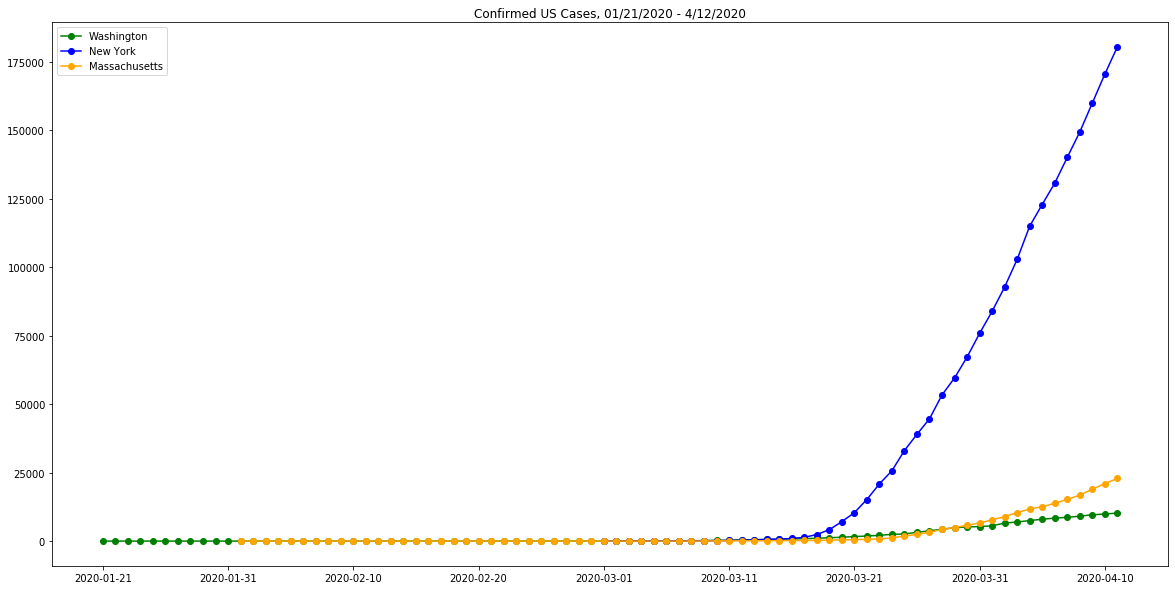

In [240]:
states_of_interest = ['Washington', 'New York', 'Massachusetts']
color_per_state = ['g', 'b', 'orange']

plt.figure(figsize=(20,10))
for i, state in enumerate(states_of_interest):
    plt.plot(midas_recent_us_states.loc[midas_recent_us_states['state'] == state].date, 
             midas_recent_us_states.loc[midas_recent_us_states['state'] == state].cases, marker = 'o', 
             label = state, color = color_per_state[i])

ax = plt.gca()
max_value = midas_recent_us_states['date'].max()
min_value = midas_recent_us_states['date'].min()
number_of_steps = 10
l = np.arange(0, len(np.unique(midas_recent_us_states.date)), number_of_steps)
ax.set(xticks=l)

plt.legend()
plt.title(f"Confirmed US Cases, 01/21/2020 - {today.month}/{today.day - 1}/{today.year}")
plt.show()

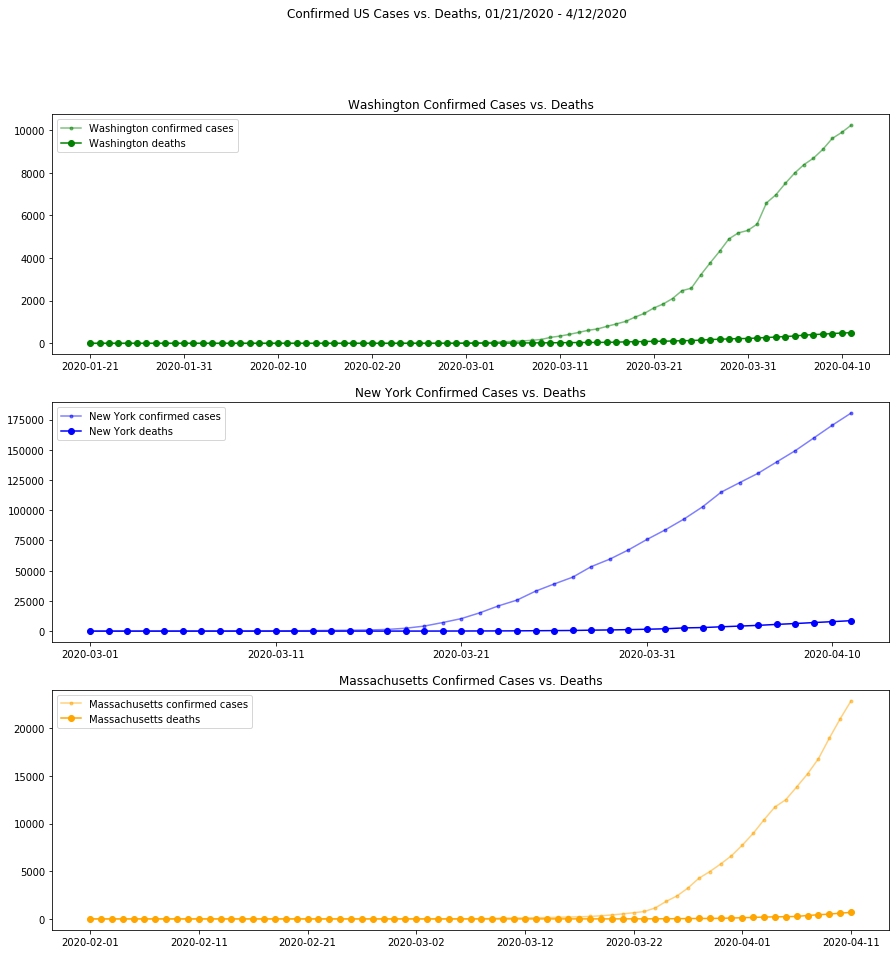

In [241]:
states_of_interest = ['Washington', 'New York', 'Massachusetts']
color_per_state = ['g', 'b', 'orange']

fig, ax = plt.subplots(3, 1, figsize=(15,15))
fig.suptitle(f"Confirmed US Cases vs. Deaths, 01/21/2020 - {today.month}/{today.day - 1}/{today.year}")
for i, state in enumerate(states_of_interest):
    ax[i].plot(midas_recent_us_states.loc[midas_recent_us_states['state'] == state].date, 
             midas_recent_us_states.loc[midas_recent_us_states['state'] == state].cases, marker = '.', 
             label = state + " confirmed cases", color = color_per_state[i], alpha = 0.5)
    ax[i].plot(midas_recent_us_states.loc[midas_recent_us_states['state'] == state].date, 
             midas_recent_us_states.loc[midas_recent_us_states['state'] == state].deaths, marker = 'o', 
             label = state + " deaths", color = color_per_state[i])
    ax[i].legend()
    max_value = midas_recent_us_states.loc[midas_recent_us_states['state'] == state].date.max()
    min_value = midas_recent_us_states.loc[midas_recent_us_states['state'] == state].date.min()
    number_of_steps = 10
    l = np.arange(0, len(np.unique(midas_recent_us_states.loc[midas_recent_us_states['state'] == state].date)), 
                  number_of_steps)
    ax[i].set(xticks=l)
    ax[i].set_title(state + " Confirmed Cases vs. Deaths")

plt.show()

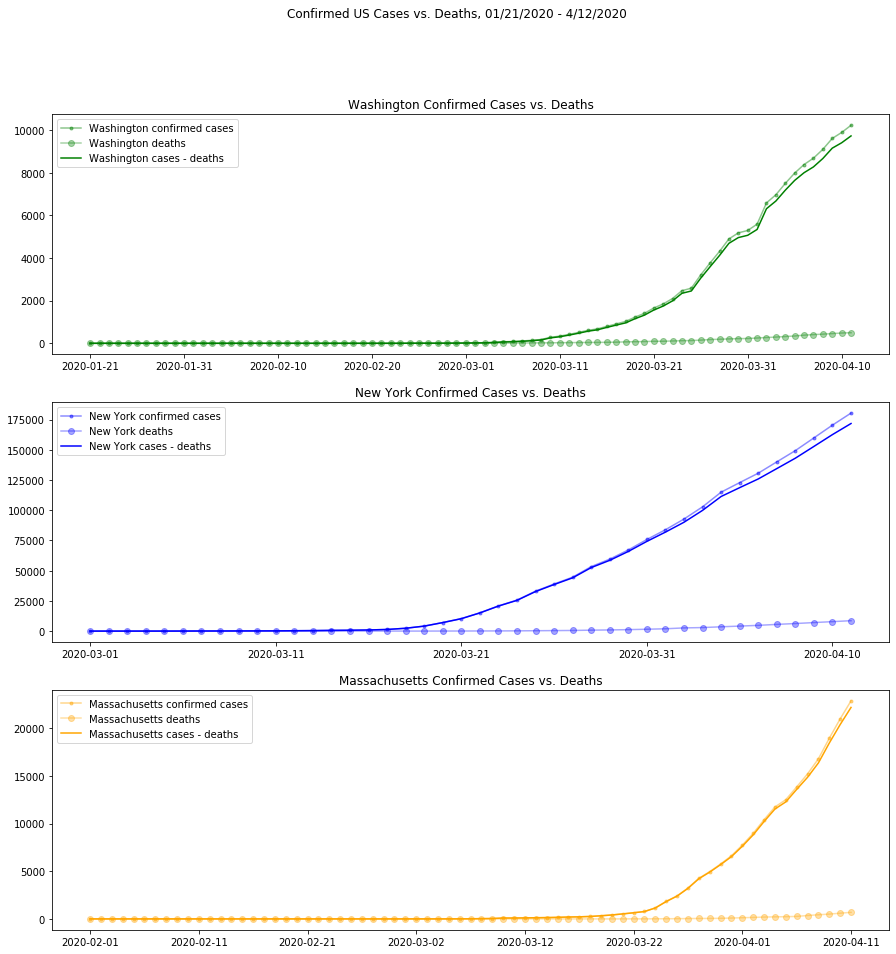

In [242]:
states_of_interest = ['Washington', 'New York', 'Massachusetts']
color_per_state = ['g', 'b', 'orange']

fig, ax = plt.subplots(3, 1, figsize=(15,15))
fig.suptitle(f"Confirmed US Cases vs. Deaths, 01/21/2020 - {today.month}/{today.day - 1}/{today.year}")
for i, state in enumerate(states_of_interest):
    ax[i].plot(midas_recent_us_states.loc[midas_recent_us_states['state'] == state].date, 
             midas_recent_us_states.loc[midas_recent_us_states['state'] == state].cases, marker = '.', 
             label = state + " confirmed cases", color = color_per_state[i], alpha = 0.45)
    ax[i].plot(midas_recent_us_states.loc[midas_recent_us_states['state'] == state].date, 
             midas_recent_us_states.loc[midas_recent_us_states['state'] == state].deaths, marker = 'o', 
             label = state + " deaths", color = color_per_state[i], alpha = 0.35)
    ax[i].plot(midas_recent_us_states.loc[midas_recent_us_states['state'] == state].date, 
             midas_recent_us_states.loc[midas_recent_us_states['state'] == state].cases - 
               midas_recent_us_states.loc[midas_recent_us_states['state'] == state].deaths, marker = '', 
             label = state + " cases - deaths", color = color_per_state[i])
    ax[i].legend()
    max_value = midas_recent_us_states.loc[midas_recent_us_states['state'] == state].date.max()
    min_value = midas_recent_us_states.loc[midas_recent_us_states['state'] == state].date.min()
    number_of_steps = 10
    l = np.arange(0, len(np.unique(midas_recent_us_states.loc[midas_recent_us_states['state'] == state].date)), 
                  number_of_steps)
    ax[i].set(xticks=l)
    ax[i].set_title(state + " Confirmed Cases vs. Deaths")

plt.show()

One thing to note is that the US data is missing recovered cases by state. We have total recovered cases per US, but we cannot make accurate claims about each state without the recovered cases per state. 

## Pytrends API

In [3]:
!pip install pytrends

The directory '/jupyteruser/81312435/.cache/pip/http' or its parent directory is not owned by the current user and the cache has been disabled. Please check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.
The directory '/home/81312435/.cache/pip' or its parent directory is not owned by the current user and caching wheels has been disabled. check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.
You are using pip version 19.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [114]:
## Set up API
from pytrends.request import TrendReq
pytrend = TrendReq()

### Interest by region

View interest of a keyword by region. Output values are 0 - 100 where 100 means that the term is that popular as a percentage in terms of the area's amount of searches. This continuously fluctuates as trends/searches continue. Interest by region is a measure of relative popularity.

In [51]:
pytrend.build_payload(kw_list=["Covid-19", "coronavirus", "coronavirus symptoms"])
# Interest by Region
df = pytrend.interest_by_region()
df.head(10)

,Covid-19,coronavirus,coronavirus symptoms
geoName,,,
Afghanistan,0,0,0
Albania,0,0,0
Algeria,0,0,0
American Samoa,0,0,0
Andorra,0,0,0
Angola,0,0,0
Anguilla,0,0,0
Antarctica,0,0,0
Antigua & Barbuda,0,0,0


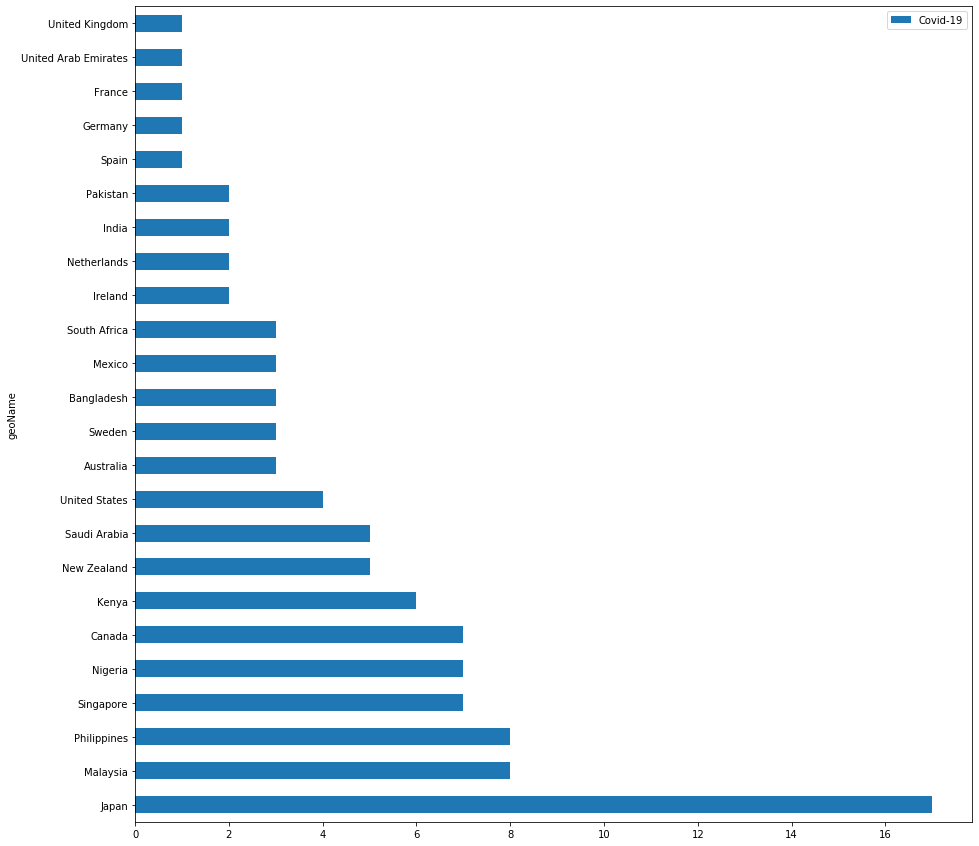

In [53]:
# plot sorted df for a keyword
keyword = 'Covid-19'
df_sort = df.sort_values(by=keyword, ascending=False)
df_sort_small = df_sort.iloc[np.where(df_sort[keyword] > 0)]
df_sort_small.reset_index().plot(x='geoName', y=keyword, figsize=(15, 15), kind ='barh')

### Daily trends

In [101]:
# Get Google Hot Trends data
df = pytrend.trending_searches(pn='united_states')
df

,0
0,Trump Twitter
1,Tarvaris Jackson
2,Thea Trachtenberg
3,Chris Wallace
4,Anthony Causi
5,Tornado Watch vs Warning
6,PlayStation Network
7,Happy Easter
8,Andrea Bocelli
9,Tornado warning


In [99]:
# The top searches via Google Trends - https://trends.google.com/trends/trendingsearches/daily?geo=US
df = pytrend.today_searches(pn='US')
df

0                    Tarvaris Jackson
1                               Fauci
2                       Trump Twitter
3               George Stephanopoulos
4                          Tara Reade
5                   Thea Trachtenberg
6                       Anthony Causi
7                       Chris Wallace
8    When will stimulus checks arrive
9                                 Dia
Name: query, dtype: object

In [84]:
# Get Google Keyword Suggestions
keywords = pytrend.suggestions(keyword='coronavirus')
df = pd.DataFrame(keywords)
df.drop(columns= 'mid')

,title,type
0,Coronavirus,Virus
1,Middle East respiratory syndrome-related coron...,Virus
2,Coronaviridae,Virus
3,Severe acute respiratory syndrome,Disease
4,Middle East respiratory syndrome,Disease


In [92]:
# Related Queries, returns a dictionary of dataframes
pytrend.build_payload(kw_list=['coronavirus'])
related_queries = pytrend.related_queries()
related_queries.values()

dict_values([{'top':                             query  value
0              update coronavirus    100
1                          corona     81
2               coronavirus cases     72
3                news coronavirus     67
4            coronavirus symptoms     62
5               india coronavirus     50
6                  uk coronavirus     50
7                coronavirus tips     40
8                    corona virus     39
9                 coronavirus map     37
10              china coronavirus     33
11             coronavirus italia     32
12                usa coronavirus     32
13             france coronavirus     31
14                 us coronavirus     30
15               coronavirus 2020     28
16              coronavirus italy     26
17             coronavirus españa     26
18                          italy     26
19               coronavirus live     25
20           coronavirus in india     24
21              world coronavirus     24
22           sintomas coronavirus   

In [94]:
related_topics = pytrend.related_topics()
related_topics.values()

dict_values([{'rising':     value formattedValue                                            link  \
0   92150       Breakout  /trends/explore?q=/g/11ckxx4f1g&date=today+5-y   
1   90500       Breakout     /trends/explore?q=/m/02r_qms&date=today+5-y   
2   79400       Breakout       /trends/explore?q=/m/0m4jc&date=today+5-y   
3   56900       Breakout       /trends/explore?q=/m/09kvv&date=today+5-y   
4   51600       Breakout      /trends/explore?q=/m/018xnw&date=today+5-y   
5   46000       Breakout    /trends/explore?q=/g/1tfkwsf1&date=today+5-y   
6   38050       Breakout       /trends/explore?q=/m/0l3cy&date=today+5-y   
7   21150       Breakout        /trends/explore?q=/m/0h7x&date=today+5-y   
8   20450       Breakout       /trends/explore?q=/m/0bzty&date=today+5-y   
9   20450       Breakout      /trends/explore?q=/m/03b6pb&date=today+5-y   
10  19750       Breakout       /trends/explore?q=/m/06c1y&date=today+5-y   
11  18750       Breakout      /trends/explore?q=/m/01vrs2&date=t

In [144]:
wa_df = pytrend.get_historical_interest(['coronavirus'], year_start=2020, month_start=3, day_start=13, hour_start=0, year_end=2020, month_end=4, day_end=13, hour_end=0, cat=0, geo='US-WA', gprop='', sleep=100)
wa_df


The request failed: Google returned a response with code 500.


,coronavirus,isPartial
date,,
2020-03-13 00:00:00,60,False
2020-03-13 01:00:00,62,False
2020-03-13 02:00:00,62,False
2020-03-13 03:00:00,62,False
2020-03-13 04:00:00,63,False
...,...,...
2020-04-12 20:00:00,42,False
2020-04-12 21:00:00,41,False
2020-04-12 22:00:00,44,False


In [130]:
ma_df = pytrend.get_historical_interest(['coronavirus'], year_start=2020, month_start=3, day_start=13, hour_start=0, year_end=2020, month_end=4, day_end=13, hour_end=0, cat=0, geo='US-MA', gprop='', sleep=100)
ma_df


The request failed: Google returned a response with code 500.


,coronavirus,isPartial
date,,
2020-03-13 00:00:00,80,False
2020-03-13 01:00:00,83,False
2020-03-13 02:00:00,86,False
2020-03-13 03:00:00,82,False
2020-03-13 04:00:00,75,False
...,...,...
2020-04-12 20:00:00,55,False
2020-04-12 21:00:00,55,False
2020-04-12 22:00:00,56,False


In [137]:
ny_df = pytrend.get_historical_interest(['coronavirus'], year_start=2020, month_start=3, day_start=13, hour_start=0, year_end=2020, month_end=4, day_end=13, hour_end=0, cat=0, geo='US-NY', gprop='', sleep=120)
ny_df


The request failed: Google returned a response with code 500.


,coronavirus,isPartial
date,,
2020-03-13 00:00:00,76,False
2020-03-13 01:00:00,78,False
2020-03-13 02:00:00,81,False
2020-03-13 03:00:00,77,False
2020-03-13 04:00:00,69,False
...,...,...
2020-04-12 20:00:00,50,False
2020-04-12 21:00:00,52,False
2020-04-12 22:00:00,53,False


In [139]:
wy_df = pytrend.get_historical_interest(['coronavirus'], year_start=2020, month_start=3, day_start=13, hour_start=0, year_end=2020, month_end=4, day_end=13, hour_end=0, cat=0, geo='US-WY', gprop='', sleep=120)
wy_df


The request failed: Google returned a response with code 500.


,coronavirus,isPartial
date,,
2020-03-13 00:00:00,60,False
2020-03-13 01:00:00,65,False
2020-03-13 02:00:00,64,False
2020-03-13 03:00:00,67,False
2020-03-13 04:00:00,60,False
...,...,...
2020-04-12 20:00:00,34,False
2020-04-12 21:00:00,40,False
2020-04-12 22:00:00,43,False


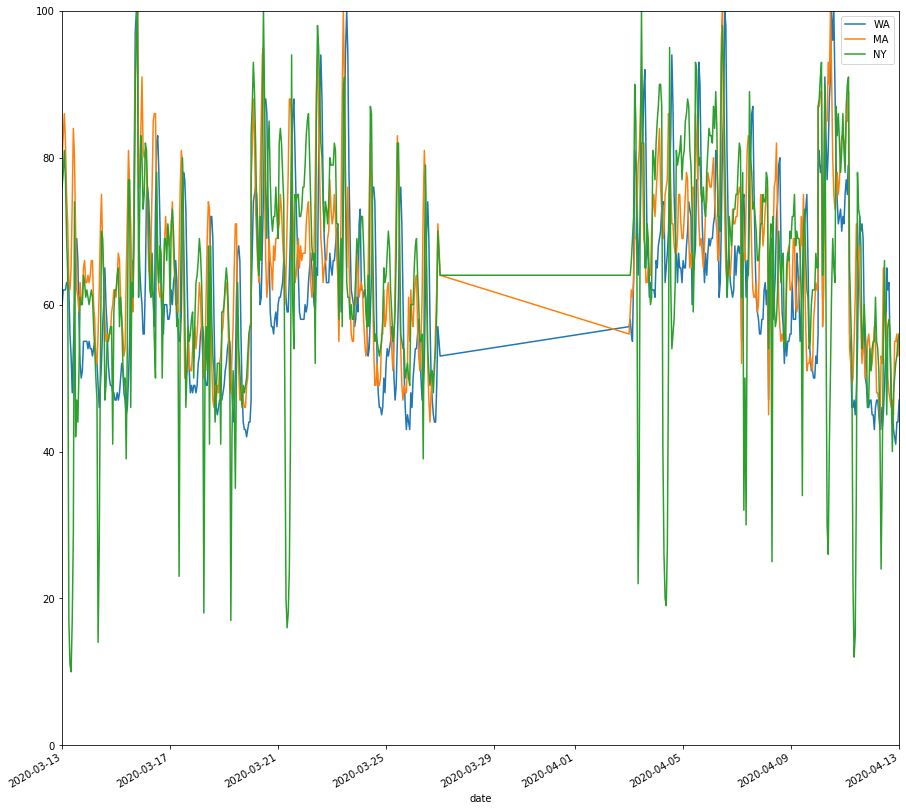

In [145]:
ax = wa_df.reset_index().plot(x='date', y='coronavirus', figsize=(15, 15), label='WA', ylim=(0, 100))
ma_df.reset_index().plot(x='date', y='coronavirus', ax=ax, label='MA')
ny_df.reset_index().plot(x='date', y='coronavirus', ax=ax, label='NY')
# wy_df.reset_index().plot(x='date', y='coronavirus', ax=ax, label='WY')


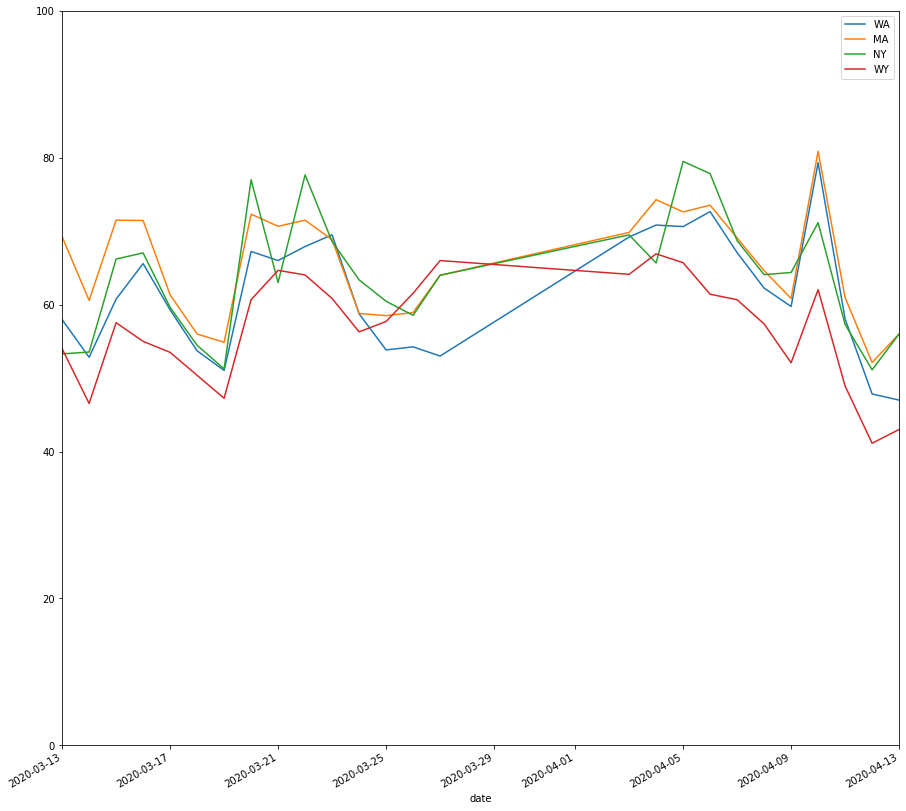

In [205]:
def avg_day(df):   
    df_date = df.reset_index()
    df_date['date'] = pd.DatetimeIndex(df_date['date']).normalize()
    return df_date.groupby(by='date').mean().reset_index()
    
ax = avg_day(wa_df).plot(x='date', y='coronavirus', label='WA', figsize=(15, 15), ylim=(0,100))
avg_day(ma_df).plot(x='date', y='coronavirus', ax=ax, label='MA')
avg_day(ny_df).plot(x='date', y='coronavirus', ax=ax, label='NY')
avg_day(wy_df).plot(x='date', y='coronavirus', ax=ax, label='WY')
